<a href="https://colab.research.google.com/github/ramkrithik/First-Decision-Tree/blob/master/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

from IPython.display import Image  
import pydotplus

In [ ]:
df=pd.read_csv("/content/data/skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
df.shape

(10000, 18)

In [ ]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [ ]:
classes={
    'STAR':0,'GALAXY':1,'QSO':2
}
df=df.replace({'class':classes})

In [ ]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512


In [ ]:
for i in range(df.shape[1]):
    column=df.iloc[:,i]
    print(df.iloc[:,i].values)
    for j in column:
        if(j>100000):
            df.drop(df.columns[i],axis=1,inplace=True)
            i+=1
            break

[1.23765e+18 1.23765e+18 1.23765e+18 ... 1.23765e+18 1.23765e+18
 1.23765e+18]
[ 0.08969303  0.13528503  0.12618509 ... 51.66698638 51.75306779
 51.80530747]
[19.47406 18.6628  19.38298 ... 18.75818 18.88287 19.27586]
[17.0424  17.21449 18.19169 ... 17.77784 17.91068 17.37829]
[15.94699 16.67637 17.47428 ... 17.51872 17.53152 16.30542]
[15.50342 16.48922 17.08732 ... 17.43302 17.36284 15.83548]
[15.22531 16.3915  16.80125 ... 17.42048 17.13988 15.50588]
[ 752  752  752 ... 1345 1345 1345]
[301 301 301 ... 301 301 301]
[4 4 4 ... 3 3 3]
[267 267 268 ... 162 163 163]
[3.72236e+18 3.63814e+17 3.23274e+17 ... 8.22262e+18 5.03340e+17
 5.03341e+17]
[-8.960000e-06 -5.490000e-05  1.231112e-01 ... -4.015730e-04  1.401894e-02
  1.184173e-01]
[3306  323  287 ... 7303  447  447]
[54922 51615 52023 ... 57013 51877 51877]
[491 541 513 ... 622 229 233]


IndexError: ignored

In [ ]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0,0.000590,3306,54922,512


In [ ]:
df.shape

(10000, 16)

In [ ]:
ins=df['class'].value_counts()
print(ins)

1    4998
0    4152
2     850
Name: class, dtype: int64


In [ ]:
column_names=["ra","dec","u","g","r","i","z","run","rerun","camcol","field","redshift","plate","mjd","fiberid","class"]
df = df.reindex(columns=column_names)
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,-0.000009,3306,54922,491,0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,-0.000055,323,51615,541,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,-0.000111,3306,54922,510,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,0.000590,3306,54922,512,0


In [ ]:
x=np.array(df.iloc[:,:15])
y=np.array(df.iloc[:,15])
print(x.shape)
print(y.shape)

(10000, 15)
(10000,)


In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=10)
tree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

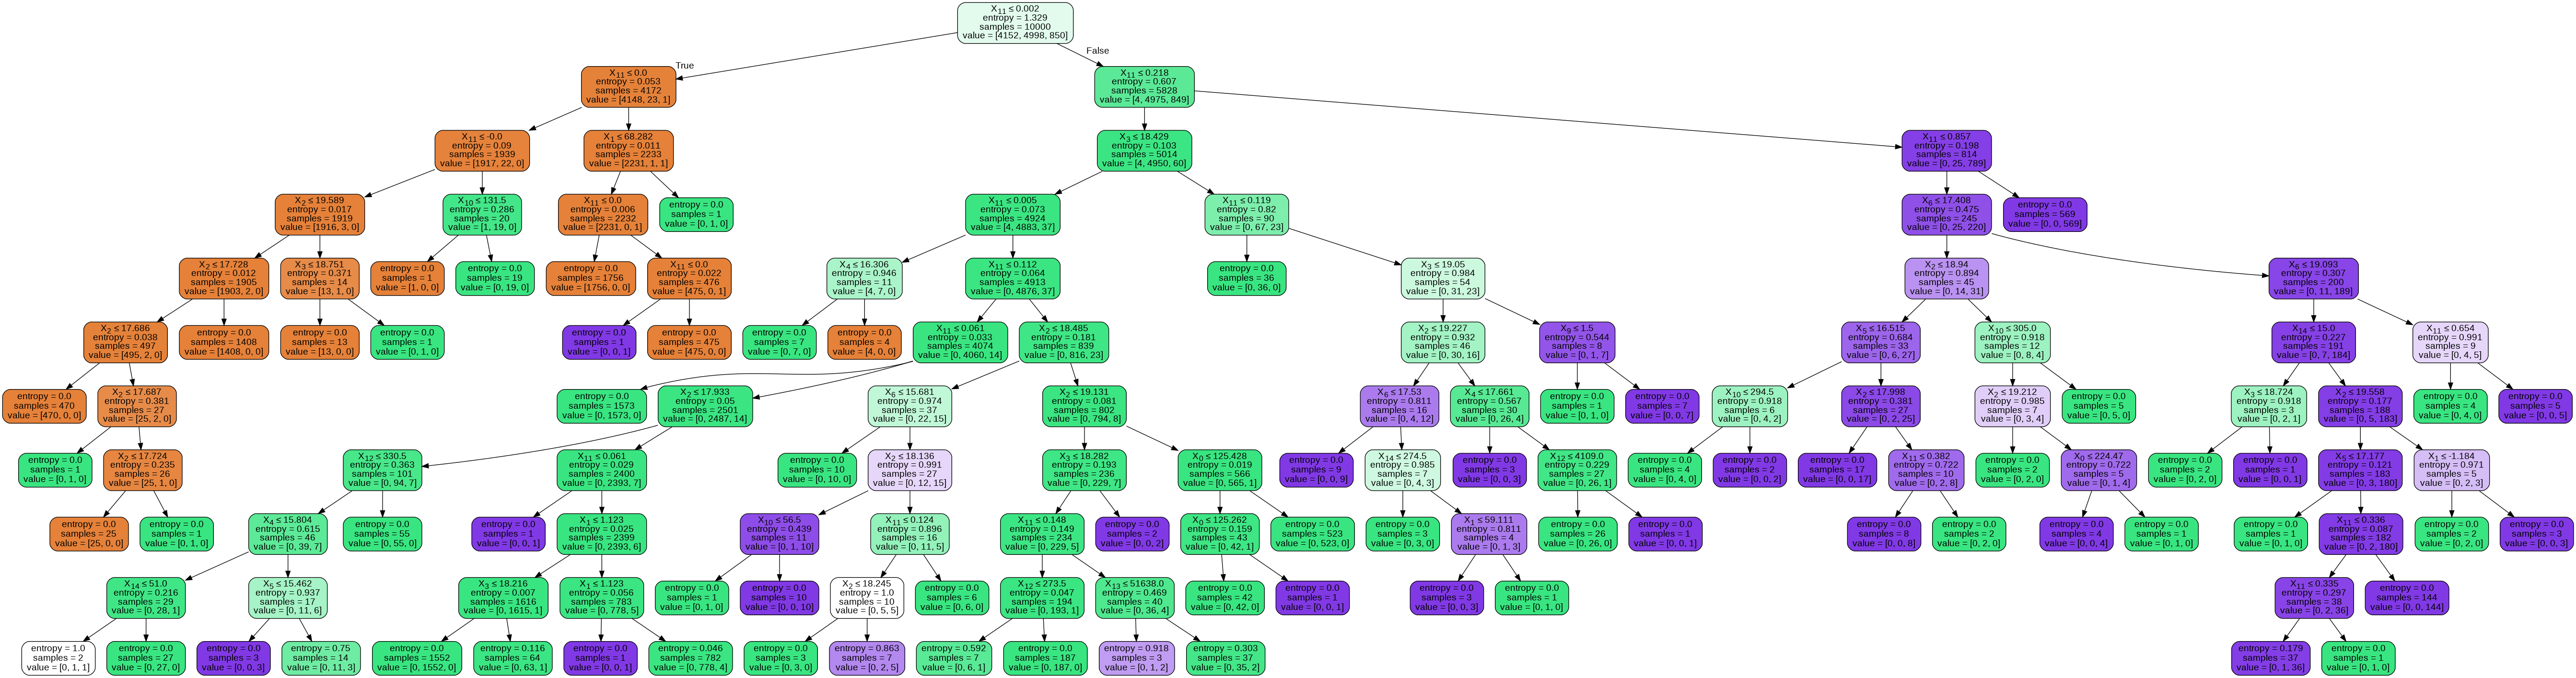

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=1000, height=1000)

In [ ]:
predict = tree.predict(x)
predict

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y, predict))

Accucary: 0.9984
